In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
delivery = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [4]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
match.shape

(756, 18)

In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
total_score_df =delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [9]:
match_df =match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [13]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [14]:
match_df = match_df[match_df['dl_applied']==0]

In [15]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [16]:
delivery_df =match_df.merge(delivery,on='match_id')

In [17]:
delivery_df =delivery_df[delivery_df['inning']==2]

In [18]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [19]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [20]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']+1

In [21]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [22]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [23]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)


In [24]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [25]:
delivery_df['wickets']=10- wickets

In [26]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [27]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)

In [28]:
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [29]:
delivery_df = delivery_df.reset_index()


In [30]:
delivery_df.drop(columns='index',inplace=True)

In [31]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner
            


In [32]:
delivery_df['winner']=is_win(delivery_df)

In [33]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]


In [34]:

final_df =final_df.sample(final_df.shape[0])


In [35]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [36]:
print(final_df.city.unique())
print(final_df.batting_team.unique())


['Chennai' 'Bangalore' 'Jaipur' 'Mumbai' 'Visakhapatnam' 'Chandigarh'
 'Kolkata' 'Nagpur' 'Delhi' 'Ranchi' 'Bengaluru' 'Hyderabad' 'East London'
 'Kimberley' 'Pune' 'Port Elizabeth' 'Centurion' 'Ahmedabad' 'Raipur'
 'Durban' 'Johannesburg' nan 'Mohali' 'Cuttack' 'Cape Town' 'Dharamsala'
 'Abu Dhabi' 'Sharjah' 'Indore' 'Bloemfontein']
['Chennai Super Kings' 'Royal Challengers Bangalore' 'Rajasthan Royals'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Mumbai Indians' 'Sunrisers Hyderabad']


In [37]:
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city
        

final_df['city']=final_df.apply(fill_city,axis=1)

In [38]:
final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [39]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [41]:

ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Updated features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), ['batting_team', 'bowling_team', 'city']),
    ], remainder='passthrough')

# Preprocessing the features
X_preprocessed = preprocessor.fit_transform(X)

# Continue with the rest of the code


In [55]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve, classification_report

c:\Users\Yash Raj\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Confusion Matrix for Logistic Regression:
 [[5366 1514]
 [1385 6170]]
Precision: 0.80
Recall: 0.82
AUC-ROC Score for Logistic Regression: 0.89


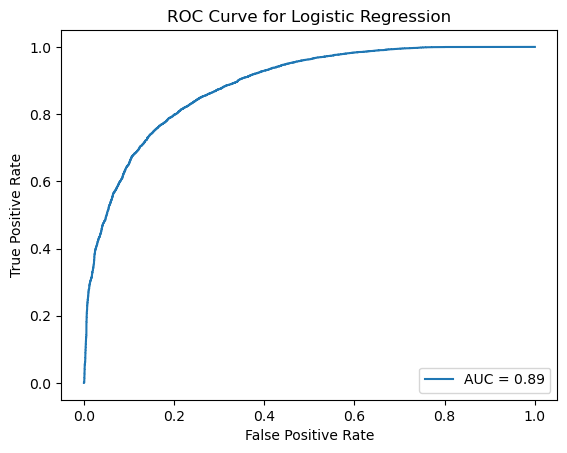


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      6880
           1       0.80      0.82      0.81      7555

    accuracy                           0.80     14435
   macro avg       0.80      0.80      0.80     14435
weighted avg       0.80      0.80      0.80     14435



In [56]:
# Pipeline for Logistic Regression
pipe_lr = Pipeline([
    ('transform', trf),
    ('model', LogisticRegression(solver='liblinear'))
])

# Train Logistic Regression model
pipe_lr.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred_lr = pipe_lr.predict(X_test)
y_pred_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]  # For AUC-ROC curve

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix for Logistic Regression:\n", cm_lr)

# Precision and Recall
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")

# AUC-ROC Curve
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
print(f"AUC-ROC Score for Logistic Regression: {auc_lr:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {auc_lr:.2f}')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Classification Report
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))


c:\Users\Yash Raj\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Confusion Matrix for Random Forest:
 [[6868   12]
 [   4 7551]]
Precision: 1.00
Recall: 1.00
AUC-ROC Score for Random Forest: 1.00


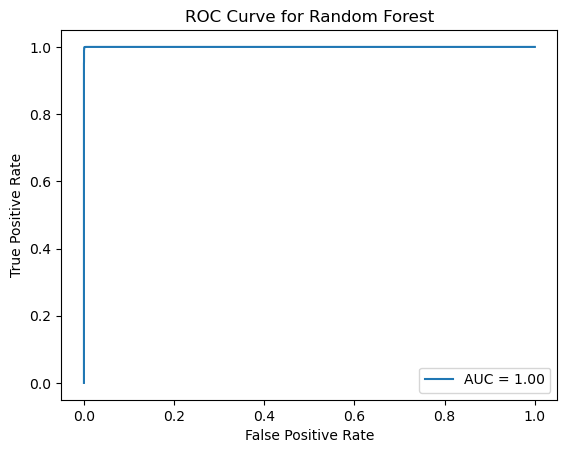


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6880
           1       1.00      1.00      1.00      7555

    accuracy                           1.00     14435
   macro avg       1.00      1.00      1.00     14435
weighted avg       1.00      1.00      1.00     14435



In [57]:
# Pipeline for Random Forest
pipe_rf = Pipeline([
    ('transform', trf),
    ('model', RandomForestClassifier())
])

# Train Random Forest model
pipe_rf.fit(X_train, y_train)

# Predictions for Random Forest
y_pred_rf = pipe_rf.predict(X_test)
y_pred_prob_rf = pipe_rf.predict_proba(X_test)[:, 1]  # For AUC-ROC curve

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:\n", cm_rf)

# Precision and Recall
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")

# AUC-ROC Curve
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
print(f"AUC-ROC Score for Random Forest: {auc_rf:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.2f}')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Classification Report
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


c:\Users\Yash Raj\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Confusion Matrix for Naive Bayes:
 [[4672 2208]
 [1904 5651]]
Precision: 0.72
Recall: 0.75
AUC-ROC Score for Naive Bayes: 0.77


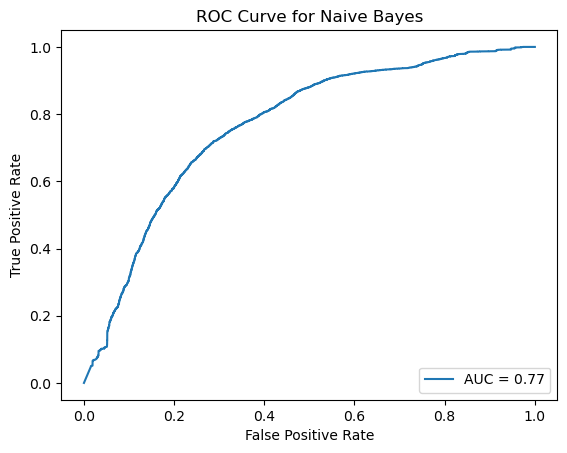


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.71      0.68      0.69      6880
           1       0.72      0.75      0.73      7555

    accuracy                           0.72     14435
   macro avg       0.71      0.71      0.71     14435
weighted avg       0.71      0.72      0.71     14435



In [58]:
from sklearn.naive_bayes import GaussianNB

# Pipeline for Naive Bayes
pipe_nb = Pipeline([
    ('transform', trf),
    ('model', GaussianNB())
])

# Train Naive Bayes model
pipe_nb.fit(X_train, y_train)

# Predictions for Naive Bayes
y_pred_nb = pipe_nb.predict(X_test)
y_pred_prob_nb = pipe_nb.predict_proba(X_test)[:, 1]  # For AUC-ROC curve

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix for Naive Bayes:\n", cm_nb)

# Precision and Recall
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")

# AUC-ROC Curve
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
print(f"AUC-ROC Score for Naive Bayes: {auc_nb:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, label=f'AUC = {auc_nb:.2f}')
plt.title('ROC Curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Classification Report
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))
